In [3]:
import os, sys
os.chdir('/home/koritskiy/rqc/hamiltonian_learning')

from random import seed

from modules.main import *
import matplotlib.pyplot as plt

In [6]:
def double_plot(Y1, Y2, Y1_name=None, Y2_name=None):

    X = range(len(Y1))
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('iterations')
    if Y1_name:
        ax1.set_ylabel(Y1_name, color=color)
    else:
        ax1.set_ylabel("Y1", color=color)
    ax1.scatter(X, Y1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    if Y1_name:
        ax2.set_ylabel(Y2_name, color=color)
    else:
        ax2.set_ylabel("Y2", color=color)  # we've already handled the x-label with ax1
    ax2.scatter(X, Y2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.show()

In [13]:
# Some initial parameters
# np.random.seed(43)
# seed(43)

n_spins = 1
beta = 100
cycles = 1500

lr = 0.01
gradient_iterations = 1

# Create initial random basis angles
theta = np.random.rand(n_spins) * np.pi
phi = np.random.rand(n_spins) * 2 * np.pi
# theta = np.array([0.])
# phi = np.array([0.])

angles = np.array([theta, phi]).T

# Create target hamiltonian
# x_t = np.random.rand(n_spins) * 2 - 1
# z_t = np.random.rand(n_spins) * 2 - 1
z_t = [-1]
x_t = [0]

z_g = [0]
x_g = [-1]

hamiltonian_t = Hamiltonian(n_spins, beta, z=z_t, x=x_t)
hamiltonian_t.set_density_mat()
hamiltonian_g = Hamiltonian(n_spins, beta, z=z_g, x=x_g)
hamiltonian_g.set_density_mat()

array([[0.5+0.j, 0.5+0.j],
       [0.5+0.j, 0.5+0.j]])

In [14]:
X = np.linspace(1, cycles, cycles)
Theta = np.zeros(cycles)
Phi = np.zeros(cycles)
Distance = np.zeros(cycles)

for i in range(cycles):
    grad = Gradient(hamiltonian_t, hamiltonian_g, angles)
    angles = grad.gradient_descent(lr=lr, num_iterations=gradient_iterations)
    singles_t = hamiltonian_t.measure(angles)
    singles_g = hamiltonian_g.measure(angles)
    
    Theta[i] = angles[0, 0] / np.pi
    Phi[i] = angles[0, 1] /np.pi

    print(f"singles_t {singles_t}")
    print(f"singles_g {singles_g}")
    print(f"distance {distance_by_measurements(singles_g, singles_t)}")
    print(f"theta {Theta[i]}")
    print(f"phi {Phi[i]}")
    print(' ')


    Distance[i] = distance_by_measurements(singles_g, singles_t)

singles_t [[7.09321224e-04 9.99290679e-01]]
singles_g [[0.52532843 0.47467157]]
distance 0.27522520828662383
theta 0.9830428463203927
phi 0.09969603431058208
 
singles_t [[8.40098168e-04 9.99159902e-01]]
singles_g [[0.52756203 0.47243797]]
distance 0.2774359979626483
theta 0.9815453433729189
phi 0.09972343083819724
 
singles_t [[9.81693165e-04 9.99018307e-01]]
singles_g [[0.52979135 0.47020865]]
distance 0.27963964866953994
theta 0.9800501750432747
phi 0.09975337163427742
 
singles_t [[0.00113404 0.99886596]]
singles_g [[0.5320161 0.4679839]]
distance 0.2818357650489815
theta 0.9785574748501283
phi 0.09978587284046159
 
singles_t [[0.00129706 0.99870294]]
singles_g [[0.53423604 0.46576396]]
distance 0.2840239563506076
theta 0.9770673753554379
phi 0.0998209502616275
 
singles_t [[0.00147068 0.99852932]]
singles_g [[0.5364509 0.4635491]]
distance 0.2862038366843485
theta 0.975580008108684
phi 0.09985861936452078
 
singles_t [[0.00165482 0.99834518]]
singles_g [[0.53866043 0.46133957]]
di

singles_t [[0.02446325 0.97553675]]
singles_g [[0.64592681 0.35407319]]
distance 0.3862169604734662
theta 0.9000174934905013
phi 0.10643258661029212
 
singles_t [[0.02503233 0.97496767]]
singles_g [[0.64753898 0.35246102]]
distance 0.38751452735507136
theta 0.8988514822570622
phi 0.10663316139083569
 
singles_t [[0.02560408 0.97439592]]
singles_g [[0.6491374 0.3508626]]
distance 0.3887937987121123
theta 0.8976929331425362
phi 0.10683670543340834
 
singles_t [[0.02617836 0.97382164]]
singles_g [[0.65072204 0.34927796]]
distance 0.3900548117007738
theta 0.8965418711139088
phi 0.1070432185092757
 
singles_t [[0.02675502 0.97324498]]
singles_g [[0.65229288 0.34770712]]
distance 0.3912976085262673
theta 0.895398319401586
phi 0.10725270025425797
 
singles_t [[0.02733394 0.97266606]]
singles_g [[0.65384989 0.34615011]]
distance 0.3925222362911251
theta 0.8942622995231633
phi 0.10746515017323627
 
singles_t [[0.02791497 0.97208503]]
singles_g [[0.65539305 0.34460695]]
distance 0.39372874684330

singles_t [[0.06141329 0.93858671]]
singles_g [[0.72175684 0.27824316]]
distance 0.4360536128328052
theta 0.8405736268837819
phi 0.1251886200578437
 
singles_t [[0.06193756 0.93806244]]
singles_g [[0.72252675 0.27747325]]
distance 0.4363780872559461
theta 0.8398799243903721
phi 0.12557541329773164
 
singles_t [[0.06245885 0.93754115]]
singles_g [[0.72328512 0.27671488]]
distance 0.43669136131018527
theta 0.8391928767269674
phi 0.12596502741094165
 
singles_t [[0.06297712 0.93702288]]
singles_g [[0.724032 0.275968]]
distance 0.4369935546776777
theta 0.8385124497318154
phi 0.12635745937625312
 
singles_t [[0.06349235 0.93650765]]
singles_g [[0.72476747 0.27523253]]
distance 0.43728478602472254
theta 0.8378386090342927
phi 0.12675270617087112
 
singles_t [[0.0640045 0.9359955]]
singles_g [[0.72549159 0.27450841]]
distance 0.4375651729786311
theta 0.837171320069865
phi 0.12715076477032194
 
singles_t [[0.06451353 0.93548647]]
singles_g [[0.72620442 0.27379558]]
distance 0.4378348321061783


singles_t [[0.08750699 0.91249301]]
singles_g [[0.74998606 0.25001394]]
distance 0.43887851342062995
theta 0.8088170731511752
phi 0.15438598626853836
 
singles_t [[0.08781553 0.91218447]]
singles_g [[0.75015332 0.24984668]]
distance 0.4386913530974063
theta 0.8084697970986384
phi 0.1549416131248448
 
singles_t [[0.08812052 0.91187948]]
singles_g [[0.75031252 0.24968748]]
distance 0.43849824798591636
theta 0.8081270596623985
phi 0.15549984790462737
 
singles_t [[0.08842196 0.91157804]]
singles_g [[0.75046369 0.24953631]]
distance 0.4382992499481456
theta 0.80778883108025
phi 0.15606068612897972
 
singles_t [[0.08871986 0.91128014]]
singles_g [[0.75060687 0.24939313]]
distance 0.43809441004708916
theta 0.8074550818046081
phi 0.15662412326109956
 
singles_t [[0.08901424 0.91098576]]
singles_g [[0.75074211 0.24925789]]
distance 0.43788377856123817
theta 0.8071257825036807
phi 0.15719015470504488
 
singles_t [[0.08930509 0.91069491]]
singles_g [[0.75086945 0.24913055]]
distance 0.4376674049

singles_t [[0.10059883 0.89940117]]
singles_g [[0.74572588 0.25427412]]
distance 0.41618891498548116
theta 0.794532700245589
phi 0.1956815933470312
 
singles_t [[0.10069774 0.89930226]]
singles_g [[0.74544402 0.25455598]]
distance 0.4156977609763644
theta 0.794428051017694
phi 0.19639410267859084
 
singles_t [[0.10079381 0.89920619]]
singles_g [[0.74515626 0.25484374]]
distance 0.4152029682401789
theta 0.7943264534175135
phi 0.19710875914508502
 
singles_t [[0.10088705 0.89911295]]
singles_g [[0.74486264 0.25513736]]
distance 0.4147045640045668
theta 0.7942278911038982
phi 0.1978255523044388
 
singles_t [[0.10097747 0.89902253]]
singles_g [[0.74456319 0.25543681]]
distance 0.41420257547006983
theta 0.7941323479040745
phi 0.19854447159875846
 
singles_t [[0.10106508 0.89893492]]
singles_g [[0.74425792 0.25574208]]
distance 0.4136970298176255
theta 0.7940398078120063
phi 0.19926550635406862
 
singles_t [[0.1011499 0.8988501]]
singles_g [[0.74394688 0.25605312]]
distance 0.413187954215907

theta 0.7931689283798512
phi 0.24181870140087358
 
singles_t [[0.10183947 0.89816053]]
singles_g [[0.71874406 0.28125594]]
distance 0.38057127959308573
theta 0.7932234014950582
phi 0.2426376141124697
 
singles_t [[0.10178552 0.89821448]]
singles_g [[0.71815391 0.28184609]]
distance 0.37990998941804116
theta 0.7932801868540488
phi 0.24345784685585817
 
singles_t [[0.1017294 0.8982706]]
singles_g [[0.71755962 0.28244038]]
distance 0.379246859498064
theta 0.7933392752975267
phi 0.24427938272234884
 
singles_t [[0.10167111 0.89832889]]
singles_g [[0.71696123 0.28303877]]
distance 0.3785819234838335
theta 0.793400657738425
phi 0.24510220472084956
 
singles_t [[0.10161067 0.89838933]]
singles_g [[0.71635876 0.28364124]]
distance 0.3779152151723097
theta 0.7934643251605348
phi 0.24592629577924208
 
singles_t [[0.10154809 0.89845191]]
singles_g [[0.71575226 0.28424774]]
distance 0.37724676850509803
theta 0.793530268617145
phi 0.2467516387457808
 
singles_t [[0.10148337 0.89851663]]
singles_g [

singles_t [[0.09459641 0.90540359]]
singles_g [[0.67487374 0.32512626]]
distance 0.3367217772722538
theta 0.8009715019240343
phi 0.29614536343134973
 
singles_t [[0.09442526 0.90557474]]
singles_g [[0.67409277 0.32590723]]
distance 0.3360144220355326
theta 0.8011577329310593
phi 0.297012249147208
 
singles_t [[0.09425257 0.90574743]]
singles_g [[0.67331 0.32669]]
distance 0.3353075099461018
theta 0.8013457870208001
phi 0.29787927472551085
 
singles_t [[0.09407836 0.90592164]]
singles_g [[0.67252548 0.32747452]]
distance 0.3346010771099939
theta 0.8015356574614672
phi 0.29874642139339697
 
singles_t [[0.09390263 0.90609737]]
singles_g [[0.67173925 0.32826075]]
distance 0.333895159525616
theta 0.8017273375337531
phi 0.2996136704084872
 
singles_t [[0.0937254 0.9062746]]
singles_g [[0.67095135 0.32904865]]
distance 0.333189793078871
theta 0.8019208205303613
phi 0.3004810030606609
 
singles_t [[0.09354668 0.90645332]]
singles_g [[0.67016181 0.32983819]]
distance 0.332485013538309
theta 0.8

singles_t [[0.08197049 0.91802951]]
singles_g [[0.62623449 0.37376551]]
distance 0.2962233069545027
theta 0.8151459620453108
phi 0.3477874487203996
 
singles_t [[0.08172593 0.91827407]]
singles_g [[0.62541759 0.37458241]]
distance 0.2956006224610133
theta 0.8154299235913117
phi 0.34863132021461285
 
singles_t [[0.08148048 0.91851952]]
singles_g [[0.62460129 0.37539871]]
distance 0.29498021257094115
theta 0.815715315805179
phi 0.34947431178853766
 
singles_t [[0.08123415 0.91876585]]
singles_g [[0.62378562 0.37621438]]
distance 0.2943621000181727
theta 0.8160021322416593
phi 0.35031640903627725
 
singles_t [[0.08098694 0.91901306]]
singles_g [[0.62297062 0.37702938]]
distance 0.293746307235497
theta 0.8162903664574852
phi 0.3511575976551107
 
singles_t [[0.08073887 0.91926113]]
singles_g [[0.62215632 0.37784368]]
distance 0.29313285635360764
theta 0.816580012011403
phi 0.35199786344598955
 
singles_t [[0.08048994 0.91951006]]
singles_g [[0.62134275 0.37865725]]
distance 0.29252176920018

singles_t [[0.06579707 0.93420293]]
singles_g [[0.57869191 0.42130809]]
distance 0.26306111902604673
theta 0.8348550876735897
phi 0.39719039555008945
 
singles_t [[0.06551731 0.93448269]]
singles_g [[0.57797008 0.42202992]]
distance 0.2626078429545644
theta 0.8352146218259066
phi 0.39795806523386085
 
singles_t [[0.0652373 0.9347627]]
singles_g [[0.57725065 0.42274935]]
distance 0.26215767648469396
theta 0.8355751989084429
phi 0.3987241711958949
 
singles_t [[0.06495704 0.93504296]]
singles_g [[0.57653364 0.42346636]]
distance 0.2617106244764025
theta 0.8359368126878955
phi 0.39948870544982246
 
singles_t [[0.06467654 0.93532346]]
singles_g [[0.57581908 0.42418092]]
distance 0.26126669153627136
theta 0.8362994569355723
phi 0.4002516601052763
 
singles_t [[0.06439583 0.93560417]]
singles_g [[0.57510698 0.42489302]]
distance 0.26082588201946455
theta 0.8366631254273887
phi 0.40101302736730876
 
singles_t [[0.06411489 0.93588511]]
singles_g [[0.57439736 0.42560264]]
distance 0.26038820003

singles_t [[0.04722648 0.95277352]]
singles_g [[0.53699493 0.46300507]]
distance 0.2398731313963977
theta 0.8605392309798244
phi 0.4442003783826185
 
singles_t [[0.04695019 0.95304981]]
singles_g [[0.53646566 0.46353434]]
distance 0.23962540247904263
theta 0.8609544119363621
phi 0.44485163351352364
 
singles_t [[0.04667424 0.95332576]]
singles_g [[0.53593966 0.46406034]]
distance 0.23938065455085616
theta 0.8613702321935219
phi 0.44550097337052935
 
singles_t [[0.04639865 0.95360135]]
singles_g [[0.53541693 0.46458307]]
distance 0.23913888012483428
theta 0.8617866856933156
phi 0.4461483948563847
 
singles_t [[0.04612342 0.95387658]]
singles_g [[0.53489747 0.46510253]]
distance 0.2389000715904889
theta 0.8622037663767558
phi 0.44679389492497873
 
singles_t [[0.04584857 0.95415143]]
singles_g [[0.53438129 0.46561871]]
distance 0.23866422121544942
theta 0.862621468183713
phi 0.44743747058071875
 
singles_t [[0.04557409 0.95442591]]
singles_g [[0.53386839 0.46613161]]
distance 0.2384313211

singles_t [[0.03079459 0.96920541]]
singles_g [[0.5100934 0.4899066]]
distance 0.2297273468990941
theta 0.8877020162014883
phi 0.48139241900338936
 
singles_t [[0.03055434 0.96944566]]
singles_g [[0.50977113 0.49022887]]
distance 0.22964873370013175
theta 0.8881455177018674
phi 0.4819186654249479
 
singles_t [[0.03031487 0.96968513]]
singles_g [[0.50945205 0.49054795]]
distance 0.22957244265811808
theta 0.8885892693650286
phi 0.48244288025737764
 
singles_t [[0.03007617 0.96992383]]
singles_g [[0.50913615 0.49086385]]
distance 0.22949846101154256
theta 0.8890332648088455
phi 0.48296506265812883
 
singles_t [[0.02983827 0.97016173]]
singles_g [[0.50882342 0.49117658]]
distance 0.22942677594721797
theta 0.8894774976427477
phi 0.48348521180911136
 
singles_t [[0.02960115 0.97039885]]
singles_g [[0.50851385 0.49148615]]
distance 0.22935737460106137
theta 0.88992196146767
phi 0.48400332691648773
 
singles_t [[0.02936484 0.97063516]]
singles_g [[0.50820745 0.49179255]]
distance 0.22929024405

singles_t [[0.01681631 0.98318369]]
singles_g [[0.49525676 0.50474324]]
distance 0.2289052621027711
theta 0.9172114585223213
phi 0.5117446880137387
 
singles_t [[0.01663665 0.98336335]]
singles_g [[0.49512458 0.50487542]]
distance 0.22895069885148178
theta 0.9176573909522923
phi 0.5121360647280935
 
singles_t [[0.01645801 0.98354199]]
singles_g [[0.49499488 0.50500512]]
distance 0.22899753773021528
theta 0.9181031345788389
phi 0.5125254013679845
 
singles_t [[0.0162804 0.9837196]]
singles_g [[0.49486765 0.50513235]]
distance 0.22904576410332786
theta 0.9185486825278655
phi 0.512912698514024
 
singles_t [[0.01610381 0.98389619]]
singles_g [[0.49474289 0.50525711]]
distance 0.22909536333070202
theta 0.9189940279218602
phi 0.5132979567687039
 
singles_t [[0.01592826 0.98407174]]
singles_g [[0.49462056 0.50537944]]
distance 0.22914632076850736
theta 0.9194391638801097
phi 0.5136811767564795
 
singles_t [[0.01575373 0.98424627]]
singles_g [[0.49450066 0.50549934]]
distance 0.229198621769966

singles_t [[0.00800228 0.99199772]]
singles_g [[0.49123226 0.50876774]]
distance 0.23351120759030763
theta 0.9429746411551768
phi 0.5313746617204116
 
singles_t [[0.00788431 0.99211569]]
singles_g [[0.49122119 0.50877881]]
distance 0.23361454555504127
theta 0.9433976769569536
phi 0.5316474233100477
 
singles_t [[0.00776736 0.99223264]]
singles_g [[0.49121172 0.50878828]]
distance 0.23371844065336128
theta 0.9438201210869879
phi 0.5319182197606036
 
singles_t [[0.00765145 0.99234855]]
singles_g [[0.49120381 0.50879619]]
distance 0.23382287938275673
theta 0.9442419669444183
phi 0.5321870531172271
 
singles_t [[0.00753657 0.99246343]]
singles_g [[0.49119745 0.50880255]]
distance 0.23392784828545596
theta 0.9446632079428477
phi 0.5324539254528996
 
singles_t [[0.00742271 0.99257729]]
singles_g [[0.49119263 0.50880737]]
distance 0.23403333394927514
theta 0.9450838375107038
phi 0.5327188388685158
 
singles_t [[0.00730988 0.99269012]]
singles_g [[0.49118933 0.50881067]]
distance 0.23413932300

singles_t [[0.00249002 0.99750998]]
singles_g [[0.49300583 0.50699417]]
distance 0.24060575981082766
theta 0.9682193831974484
phi 0.5448189400376903
 
singles_t [[0.00243186 0.99756814]]
singles_g [[0.49306419 0.50693581]]
distance 0.24072008221852764
theta 0.9685930403524474
phi 0.544973029952746
 
singles_t [[0.00237454 0.99762546]]
singles_g [[0.49312318 0.50687682]]
distance 0.2408342296754421
theta 0.9689657323688091
phi 0.5451253397953342
 
singles_t [[0.00231804 0.99768196]]
singles_g [[0.49318278 0.50681722]]
distance 0.24094819296560765
theta 0.9693374542399389
phi 0.5452758734293407
 
singles_t [[0.00226236 0.99773764]]
singles_g [[0.49324298 0.50675702]]
distance 0.24106196296020943
theta 0.9697082009946536
phi 0.5454246347468145
 
singles_t [[0.00220751 0.99779249]]
singles_g [[0.49330376 0.50669624]]
distance 0.24117553061796956
theta 0.9700779676974406
phi 0.5455716276678837
 
singles_t [[0.00215347 0.99784653]]
singles_g [[0.49336512 0.50663488]]
distance 0.2412888869855

singles_t [[3.64444049e-04 9.99635556e-01]]
singles_g [[0.49696175 0.50303825]]
distance 0.24660888797191174
theta 0.9878459242951333
phi 0.5508848073679087
 
singles_t [[3.45988548e-04 9.99654011e-01]]
singles_g [[0.49703622 0.50296378]]
distance 0.2467011842696938
theta 0.9881577007404082
phi 0.550944380134242
 
singles_t [[3.28079983e-04 9.99671920e-01]]
singles_g [[0.49711065 0.50288935]]
distance 0.24679292615085133
theta 0.988468289262168
phi 0.5510024345620644
 
singles_t [[3.10713061e-04 9.99689287e-01]]
singles_g [[0.49718505 0.50281495]]
distance 0.24688410964399235
theta 0.9887776871722921
phi 0.5510589759137813
 
singles_t [[2.93882492e-04 9.99706118e-01]]
singles_g [[0.49725941 0.50274059]]
distance 0.24697473086831703
theta 0.9890858918265117
phi 0.5511140094713535
 
singles_t [[2.77582985e-04 9.99722417e-01]]
singles_g [[0.4973337 0.5026663]]
distance 0.24706478603335033
theta 0.9893929006244362
phi 0.5511675405360915
 
singles_t [[2.61809253e-04 9.99738191e-01]]
singles

singles_t [[3.75468608e-05 9.99962453e-01]]
singles_g [[0.50099655 0.49900345]]
distance 0.25095991934554635
theta 1.0039009434727784
phi 0.5519998937621564
 
singles_t [[4.23044515e-05 9.99957696e-01]]
singles_g [[0.50105741 0.49894259]]
distance 0.2510161353053712
theta 1.0041407233869577
phi 0.5519806123013248
 
singles_t [[4.73182463e-05 9.99952682e-01]]
singles_g [[0.50111788 0.49888212]]
distance 0.251071704285787
theta 1.004379231140492
phi 0.5519601432322825
 
singles_t [[5.25837460e-05 9.99947416e-01]]
singles_g [[0.50117794 0.49882206]]
distance 0.25112662686893705
theta 1.0046164665163537
phi 0.5519384925815126
 
singles_t [[5.80964751e-05 9.99941904e-01]]
singles_g [[0.50123761 0.49876239]]
distance 0.25118090369924895
theta 1.004852429336928
phi 0.5519156663818171
 
singles_t [[6.38519821e-05 9.99936148e-01]]
singles_g [[0.50129687 0.49870313]]
distance 0.251234535482795
theta 1.0050871194638473
phi 0.5518916706720844
 
singles_t [[6.98458400e-05 9.99930154e-01]]
singles_g

singles_t [[5.70470031e-04 9.99429530e-01]]
singles_g [[0.50368604 0.49631396]]
distance 0.2531252748489583
theta 1.015206800233764
phi 0.549335283867277
 
singles_t [[5.83328544e-04 9.99416671e-01]]
singles_g [[0.50372166 0.49627834]]
distance 0.2531481821798729
theta 1.0153772603984725
phi 0.5492597219473975
 
singles_t [[5.96235909e-04 9.99403764e-01]]
singles_g [[0.5037568 0.4962432]]
distance 0.2531705498365358
theta 1.0155464900647555
phi 0.549183307384546
 
singles_t [[6.09189174e-04 9.99390811e-01]]
singles_g [[0.50379144 0.49620856]]
distance 0.25319238085284185
theta 1.0157144908946882
phi 0.5491060462260045
 
singles_t [[6.22185413e-04 9.99377815e-01]]
singles_g [[0.5038256 0.4961744]]
distance 0.25321367828919467
theta 1.015881264578468
phi 0.5490279445137475
 
singles_t [[6.35221734e-04 9.99364778e-01]]
singles_g [[0.50385927 0.49614073]]
distance 0.25323444523189825
theta 1.0160468128341866
phi 0.5489490082842615
 
singles_t [[6.48295273e-04 9.99351705e-01]]
singles_g [[0

singles_t [[0.00143227 0.99856773]]
singles_g [[0.5050405 0.4949595]]
distance 0.25362125506821287
theta 1.0240988371419772
phi 0.5425517466403402
 
singles_t [[0.0014432 0.9985568]]
singles_g [[0.50504546 0.49495454]]
distance 0.25361524460346957
theta 1.024190633709089
phi 0.54243158057935
 
singles_t [[0.00145404 0.99854596]]
singles_g [[0.50505004 0.49494996]]
distance 0.25360893354670977
theta 1.0242813655151037
phi 0.5423109529793845
 
singles_t [[0.00146479 0.99853521]]
singles_g [[0.50505423 0.49494577]]
distance 0.25360232553241113
theta 1.0243710356240927
phi 0.5421898691800204
 
singles_t [[0.00147546 0.99852454]]
singles_g [[0.50505805 0.49494195]]
distance 0.2535954241889557
theta 1.0244596471134353
phi 0.5420683345062374
 
singles_t [[0.00148603 0.99851397]]
singles_g [[0.50506148 0.49493852]]
distance 0.2535882331382992
theta 1.0245472030736265
phi 0.5419463542683258
 
singles_t [[0.00149652 0.99850348]]
singles_g [[0.50506455 0.49493545]]
distance 0.2535807559956458
the

singles_t [[0.0019548 0.9980452]]
singles_g [[0.50459351 0.49540649]]
distance 0.2526456705393778
theta 1.0281561514427473
phi 0.5331630302949185
 
singles_t [[0.00195819 0.99804181]]
singles_g [[0.50457806 0.49542194]]
distance 0.25262673660185936
theta 1.028180550529324
phi 0.5330224574481384
 
singles_t [[0.00196147 0.99803853]]
singles_g [[0.50456243 0.49543757]]
distance 0.25260773023444744
theta 1.028204125439721
phi 0.5328817618935268
 
singles_t [[0.00196463 0.99803537]]
singles_g [[0.50454662 0.49545338]]
distance 0.25258865405681796
theta 1.0282268797623764
phi 0.5327409477765979
 
singles_t [[0.00196768 0.99803232]]
singles_g [[0.50453063 0.49546937]]
distance 0.25256951066913486
theta 1.0282488170879223
phi 0.5326000192246604
 
singles_t [[0.00197063 0.99802937]]
singles_g [[0.50451446 0.49548554]]
distance 0.25255030265198497
theta 1.0282699410090648
phi 0.5324589803468007
 
singles_t [[0.00197346 0.99802654]]
singles_g [[0.50449812 0.49550188]]
distance 0.2525310325663163

singles_t [[0.00193958 0.99806042]]
singles_g [[0.50318969 0.49681031]]
distance 0.2512516730141087
theta 1.0280462193243134
phi 0.5230965705169046
 
singles_t [[0.0019361 0.9980639]]
singles_g [[0.50316755 0.49683245]]
distance 0.2512329616663082
theta 1.0280210407665706
phi 0.5229565400756623
 
singles_t [[0.00193255 0.99806745]]
singles_g [[0.50314539 0.49685461]]
distance 0.2512143141166265
theta 1.0279952923346518
phi 0.522816635771672
 
singles_t [[0.00192892 0.99807108]]
singles_g [[0.50312322 0.49687678]]
distance 0.2511957315749848
theta 1.0279689775273926
phi 0.5226768604562058
 
singles_t [[0.00192521 0.99807479]]
singles_g [[0.50310105 0.49689895]]
distance 0.25117721523272907
theta 1.0279420998394868
phi 0.5225372169627605
 
singles_t [[0.00192144 0.99807856]]
singles_g [[0.50307886 0.49692114]]
distance 0.2511587662627026
theta 1.027914662761424
phi 0.5223977081070822
 
singles_t [[0.00191759 0.99808241]]
singles_g [[0.50305668 0.49694332]]
distance 0.2511403858193185
the

singles_t [[0.001553 0.998447]]
singles_g [[0.50169912 0.49830088]]
distance 0.25014613888115766
theta 1.0250945118871226
phi 0.5137391709111138
 
singles_t [[0.00154597 0.99845403]]
singles_g [[0.50167983 0.49832017]]
distance 0.25013387502965934
theta 1.025037613860636
phi 0.5136139084300477
 
singles_t [[0.00153892 0.99846108]]
singles_g [[0.50166062 0.49833938]]
distance 0.2501217195110999
theta 1.024980377912651
phi 0.5134889303254044
 
singles_t [[0.00153183 0.99846817]]
singles_g [[0.50164149 0.49835851]]
distance 0.2501096724512364
theta 1.024922807128116
phi 0.5133642382773843
 
singles_t [[0.00152473 0.99847527]]
singles_g [[0.50162245 0.49837755]]
distance 0.2500977339639344
theta 1.0248649045846154
phi 0.5132398339507241
 
singles_t [[0.0015176 0.9984824]]
singles_g [[0.5016035 0.4983965]]
distance 0.2500859041512756
theta 1.0248066733523364
phi 0.5131157189947371
 
singles_t [[0.00151045 0.99848955]]
singles_g [[0.50158462 0.49841538]]
distance 0.2500741831036644
theta 1.0

singles_t [[0.00109939 0.99890061]]
singles_g [[0.50069448 0.49930552]]
distance 0.2495952510572867
theta 1.021112348023731
phi 0.5066712129202808
 
singles_t [[0.0010919 0.9989081]]
singles_g [[0.50068118 0.49931882]]
distance 0.24958945347916112
theta 1.0210402024221608
phi 0.5065658371320692
 
singles_t [[0.00108441 0.99891559]]
singles_g [[0.50066799 0.49933201]]
distance 0.24958375397750507
theta 1.020967892617203
phi 0.5064608214076324
 
singles_t [[0.00107693 0.99892307]]
singles_g [[0.5006549 0.4993451]]
distance 0.2495781521460704
theta 1.0208954211970287
phi 0.50635616656069
 
singles_t [[0.00106946 0.99893054]]
singles_g [[0.50064192 0.49935808]]
distance 0.24957264757303052
theta 1.0208227907410272
phi 0.5062518733921096
 
singles_t [[0.00106199 0.99893801]]
singles_g [[0.50062905 0.49937095]]
distance 0.24956723984107404
theta 1.0207500038197919
phi 0.5061479426899513
 
singles_t [[0.00105454 0.99894546]]
singles_g [[0.50061628 0.49938372]]
distance 0.24956192852749937
the

singles_t [[6.52701607e-04 9.99347298e-01]]
singles_g [[0.50005449 0.49994551]]
distance 0.24940214666488877
theta 1.0162661479976254
phi 0.5006791332796524
 
singles_t [[6.46473346e-04 9.99353527e-01]]
singles_g [[0.50004775 0.49995225]]
distance 0.24940163132233267
theta 1.016188337087861
phi 0.5005979353809311
 
singles_t [[6.40273591e-04 9.99359726e-01]]
singles_g [[0.5000411 0.4999589]]
distance 0.24940118046761406
theta 1.0161105094063363
phi 0.500517125607696
 
singles_t [[6.34102520e-04 9.99365897e-01]]
singles_g [[0.50003454 0.49996546]]
distance 0.24940079350909214
theta 1.0160326669568758
phi 0.5004367040430174
 
singles_t [[6.27960309e-04 9.99372040e-01]]
singles_g [[0.50002807 0.49997193]]
distance 0.24940046985464426
theta 1.0159548117339539
phi 0.5003566707600441
 
singles_t [[6.21847127e-04 9.99378153e-01]]
singles_g [[0.5000217 0.4999783]]
distance 0.24940020891172984
theta 1.015876945722692
phi 0.5002770258220492
 
singles_t [[6.15763141e-04 9.99384237e-01]]
singles_g

singles_t [[3.38157044e-04 9.99661843e-01]]
singles_g [[0.49980078 0.50019922]]
distance 0.249462914948676
theta 1.0117074907064203
phi 0.4965509557913449
 
singles_t [[3.3380003e-04 9.9966620e-01]]
singles_g [[0.49979872 0.50020128]]
distance 0.2494652020697683
theta 1.011631814649588
phi 0.4964924978656613
 
singles_t [[3.29476132e-04 9.99670524e-01]]
singles_g [[0.49979671 0.50020329]]
distance 0.24946751972413617
theta 1.0115562240526261
phi 0.49643441748776174
 
singles_t [[3.25185335e-04 9.99674815e-01]]
singles_g [[0.49979477 0.50020523]]
distance 0.24946986738043841
theta 1.011480720369471
phi 0.4963767142339901
 
singles_t [[3.20927624e-04 9.99679072e-01]]
singles_g [[0.49979289 0.50020711]]
distance 0.24947224450958597
theta 1.0114053050448755
phi 0.49631938767346906
 
singles_t [[3.16702980e-04 9.99683297e-01]]
singles_g [[0.49979108 0.50020892]]
distance 0.24947465058477186
theta 1.0113299795144177
phi 0.4962624373681444
 
singles_t [[3.12511385e-04 9.99687489e-01]]
singles

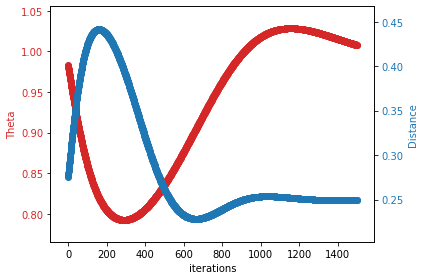

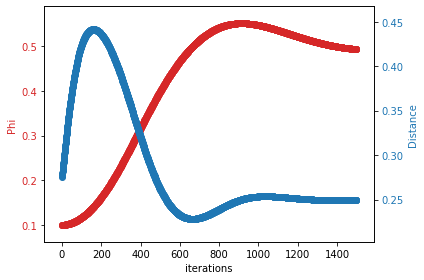

In [15]:
double_plot(Theta, Distance, "Theta", "Distance")
double_plot(Phi, Distance, "Phi", "Distance")

In [10]:
angles = np.array([[-np.pi/4, 0]])
singles_t = hamiltonian_t.measure(angles)
singles_g = hamiltonian_g.measure(angles)
distance_by_measurements(singles_g, singles_t)


0.4999999999999999

In [24]:
singles_t

array([[0.85355339, 0.14644661]])

In [25]:
singles_g

array([[0.14644661, 0.85355339]])